In [1]:
import tensorflow as tf
tf.enable_eager_execution()

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

from training_backend import training

from testing_backend import testing, tumor_predict_mask, heatmap_evaluation

In [4]:
num_pixels = 64
num_level = 3
ds_train, steps_per_epoch_train = training(num_pixels, num_level)

In [6]:
ds, steps_per_epoch, all_image_paths, mask_image, \
tissue_regions, depth, width = testing(num_pixels, num_level)

In [1]:
## Optional: remove sliced images from directory if necessary
# !rm -r 'data'

In [7]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


In [8]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])
model.summary()

history = model.fit(ds_train, epochs=1, steps_per_epoch=steps_per_epoch_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                262176    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 14,976,930
Trainable params: 262,242
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/1


 1/17 [>.............................] - ETA: 5:49 - loss: 0.7212 - acc: 0.5625

 2/17 [==>...........................] - ETA: 5:11 - loss: 1.7963 - acc: 0.5000

 3/17 [====>.........................] - ETA: 4:34 - loss: 1.5950 - acc: 0.4896

 4/17 [======>.......................] - ETA: 4:04 - loss: 1.3657 - acc: 0.5000

 5/17 [=======>......................] - ETA: 3:42 - loss: 1.2738 - acc: 0.5188

 6/17 [=========>....................] - ETA: 3:32 - loss: 1.2512 - acc: 0.5104

 7/17 [===========>..................] - ETA: 3:21 - loss: 1.1663 - acc: 0.5312

 8/17 [=============>................] - ETA: 3:02 - loss: 1.1067 - acc: 0.5234

 9/17 [==============>...............] - ETA: 2:40 - loss: 1.0473 - acc: 0.5451

10/17 [================>.............] - ETA: 2:17 - loss: 1.0021 - acc: 0.5531

11/17 [==================>...........] - ETA: 1:58 - loss: 0.9682 - acc: 0.5511

12/17 [====================>.........] - ETA: 1:39 - loss: 0.9445 - acc: 0.5469

13/17 [=====================>........] - ETA: 1:20 - loss: 0.9303 - acc: 0.5385

14/17 [=======================>......] - ETA: 59s - loss: 0.9027 - acc: 0.5469 

15/17 [=========================>....] - ETA: 39s - loss: 0.8841 - acc: 0.5542

16/17 [===========================>..] - ETA: 19s - loss: 0.8594 - acc: 0.5703

17/17 [==============================] - 332s 20s/step - loss: 0.8395 - acc: 0.5864


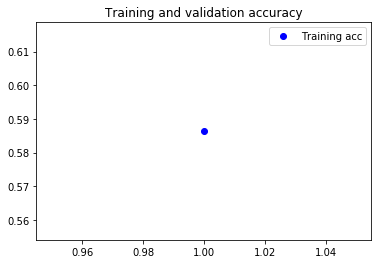

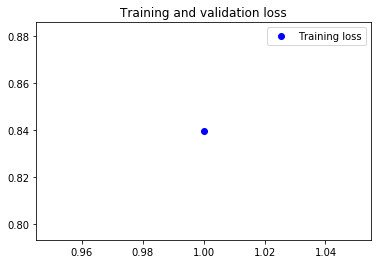

In [9]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_predicts = model.predict(ds_test, steps = steps_per_epoch_test)

In [18]:
predictions = tumor_predict_mask(test_predicts, all_image_paths, depth, width) 

NameError: name 'image_depth' is not defined

NameError: name 'slide_image' is not defined

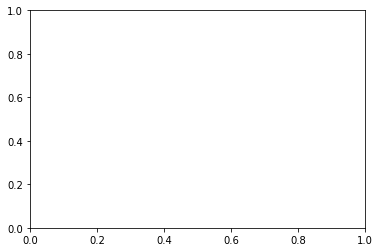

In [ ]:
fig1, ax1 = plt.subplots()
plt.imshow(slide_image)
ax1.set_title("Original Image")

fig2, ax2 = plt.subplots()
plt.imshow(predictions)
ax2.set_title("Predicted Tumor Mask")

fig3, ax3 = plt.subplots()
plt.imshow(mask_image)
ax3.set_title("Actual Tumor Mask")

In [ ]:
heatmap_evaluation(predictions, tissue_regions, mask_image)